In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError


In [ ]:

iris = load_iris()
X = iris.data
X = StandardScaler().fit_transform(X)

X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

In [ ]:

pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train)
X_train_pca_reconstructed = pca.inverse_transform(X_train_pca)
pca_loss = np.mean((X_train - X_train_pca_reconstructed)**2)
print(f"PCA Reconstruction Loss: {pca_loss:.6f}")

def build_autoencoder(activation='linear', input_dim=4, encoding_dim=3):
    """
    Build an autoencoder with the given activation function
    """
    input_layer = Input(shape=(input_dim,))
    encoded = Dense(encoding_dim, activation=activation)(input_layer)
    decoded = Dense(input_dim, activation='linear')(encoded)
    autoencoder = Model(inputs=input_layer, outputs=decoded)
    encoder = Model(inputs=input_layer, outputs=encoded)

    autoencoder.compile(optimizer=Adam(learning_rate=0.01), loss=MeanSquaredError())
    return autoencoder, encoder


PCA Reconstruction Loss: 0.004781


In [ ]:

activations = ['linear', 'sigmoid', 'relu']
histories = {}
losses = {}

for act in activations:
    print(f"\nTraining {act.upper()} Autoencoder...")
    autoencoder, encoder = build_autoencoder(activation=act)
    history = autoencoder.fit(X_train, X_train,
                              epochs=100,
                              batch_size=8,
                              shuffle=True,
                              validation_data=(X_test, X_test),
                              verbose=0)
    histories[act] = history
    loss = autoencoder.evaluate(X_test, X_test, verbose=0)
    losses[act] = loss
    print(f"{act.upper()} Autoencoder Loss: {loss:.6f}")



Training LINEAR Autoencoder...
LINEAR Autoencoder Loss: 0.006877

Training SIGMOID Autoencoder...
SIGMOID Autoencoder Loss: 0.024362

Training RELU Autoencoder...
RELU Autoencoder Loss: 0.019219


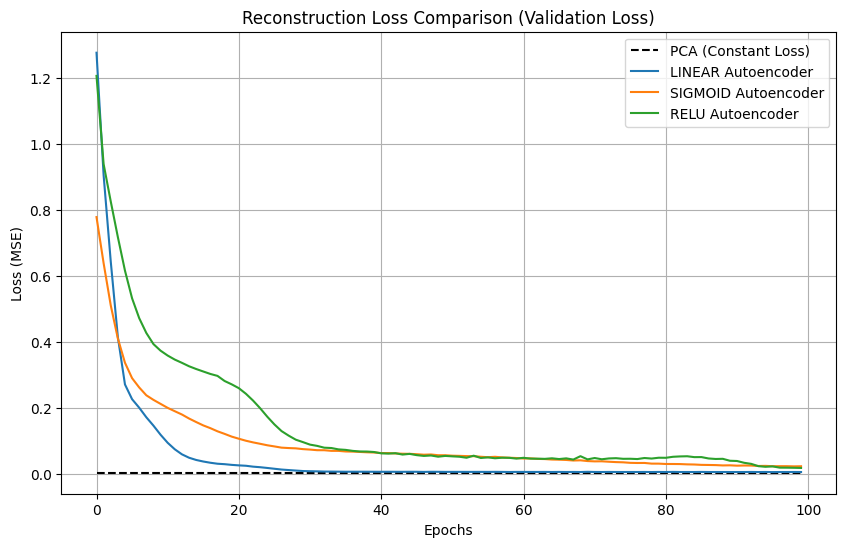

In [ ]:

plt.figure(figsize=(10, 6))
plt.plot([pca_loss]*100, 'k--', label='PCA (Constant Loss)')
for act in activations:
    plt.plot(histories[act].history['val_loss'], label=f'{act.upper()} Autoencoder')
plt.title("Reconstruction Loss Comparison (Validation Loss)")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:

print("\n=== Final Reconstruction Losses ===")
print(f"PCA Loss: {pca_loss:.6f}")
for act in activations:
    print(f"{act.upper()} Autoencoder Loss: {losses[act]:.6f}")


=== Final Reconstruction Losses ===
PCA Loss: 0.004781
LINEAR Autoencoder Loss: 0.006877
SIGMOID Autoencoder Loss: 0.024362
RELU Autoencoder Loss: 0.019219
